# Customer Ask Preview

XYZ Corporation uses data to develop marketing profiles on people. These profiles are then sold to numerous companies for marketing purposes. You work at XYZ as part of a team of data analysts. Your team has just been given a new project working with UVW College, a local college looking to bolster enrollment. UVW has chosen a salary as a key demographic to determine criteria for marketing its degree programs. **You must develop marketing profiles using data supplied by the United States Census Bureau, and you will be focusing on `$50,000` as a key number for salary.** There are many key variables that must be assessed for individuals making less than and more than `$50,000`, including age, gender, education status, marital status, occupation, etc.

For example, if the data show that the majority of individuals making less than $50,000 is under 34 years old, male, single, and has a high school diploma, the college can market to this demographic with tuition amounts, program concentrations, and even ground or online programs appropriate to this demographic.

**To achieve its enrollment target, the marketing team at UVW would like to develop an application to find the factors that determine the individual's income. One way to accomplish this is to use the United States Census Bureau data provided by the XYZ company. The marketing team wants to group the factors that can be used in the development of their proposed model/application. *They also want the application to predict the income of an individual based on different values of the input parameters so that they can tailor their marketing efforts when reaching out to the individuals.***

## Report

As a team, write and submit a 1-2 page progress report for the course project. Make sure to include the date and the names of the individual members on your team. 

In your report, please describe your progress and how each member is contributing to the project.

A few reminders about the course project:

You will need to create visualizations for the UVW executives in order to analyze the data and propose which factors could be used to determine an individual's income. 
Document your design process in preparation for the Systems Documentation Report, which is due at the end of Unit 6.

 - Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
 - Description of the column names: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

# Fetch Dataset

In [1]:
import urllib
import os
import contextlib


def get_file(url, filename):
    with open(filename, 'wb') as out_file:
        with contextlib.closing(urllib.request.urlopen(url)) as fp:
            block_size = 1024 * 8
            while True:
                block = fp.read(block_size)
                if not block:
                    break
                out_file.write(block)

if not os.path.exists('tmp'):
    os.makedirs('tmp')
get_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/Index", filename="tmp/Index")
get_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", filename="tmp/adult.data")
get_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names", filename="tmp/adult.names")
get_file("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", filename="tmp/adult.test")


- [Index File](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/Index)
- [adult.data](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data)
- [adult.names](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names)
- [adult.test](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test)

# Columns 

```
| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over 50K
| a year.
|
| First cited in:
| @inproceedings{kohavi-nbtree,
|    author={Ron Kohavi},
|    title={Scaling Up the Accuracy of Naive-Bayes Classifiers: a
|           Decision-Tree Hybrid},
|    booktitle={Proceedings of the Second International Conference on
|               Knowledge Discovery and Data Mining},
|    year = 1996,
|    pages={to appear}}
|
| Error Accuracy reported as follows, after removal of unknowns from
|    train/test sets):
|    C4.5       : 84.46+-0.30
|    Naive-Bayes: 83.88+-0.30
|    NBTree     : 85.90+-0.28
|
|
| Following algorithms were later run with the following error rates,
|    all after removal of unknowns and using the original train/test split.
|    All these numbers are straight runs using MLC++ with default values.
|
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04
| 17 Pebls                   Crashed.  Unknown why (bounds WERE increased)
|
| Conversion of original data as follows:
| 1. Discretized agrossincome into two ranges with threshold 50,000.
| 2. Convert U.S. to US to avoid periods.
| 3. Convert Unknown to "?"
| 4. Run MLC++ GenCVFiles to generate data,test.
|
| Description of fnlwgt (final weight)
|
| The weights on the CPS files are controlled to independent estimates of the
| civilian noninstitutional population of the US.  These are prepared monthly
| for us by Population Division here at the Census Bureau.  We use 3 sets of
| controls.
|  These are:
|          1.  A single cell estimate of the population 16+ for each state.
|          2.  Controls for Hispanic Origin by age and sex.
|          3.  Controls by Race, age and sex.
|
| We use all three sets of controls in our weighting program and "rake" through
| them 6 times so that by the end we come back to all the controls we used.
|
| The term estimate refers to population totals derived from CPS by creating
| "weighted tallies" of any specified socio-economic characteristics of the
| population.
|
| People with similar demographic characteristics should have
| similar weights.  There is one important caveat to remember
| about this statement.  That is that since the CPS sample is
| actually a collection of 51 state samples, each with its own
| probability of selection, the statement only applies within
| state.
```

Label: `>50K, <=50K`

  - **age**: continuous.
  - **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
  - **fnlwgt**: continuous.
  - **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
  - **education-num**: continuous.
  - **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
  - **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
  - **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
  - **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
  - **sex**: Female, Male.
  - **capital-gain**: continuous.
  - **capital-loss**: continuous.
  - **hours-per-week**: continuous.
  - **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


Notes:

  - **fnlwgt**: Final Weight (number of people in census survey row).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

df = pd.read_csv('tmp/adult.data', names=['age','workclass',
                                          'fnlwgt','education',
                                          'education-num','marital-status',
                                          'occupation','relationship',
                                          'race','sex',
                                          'capital-gain','capital-loss',
                                          'hours-per-week','native-country','label'])
print(df.shape)
display(df[:10])

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
avg_age_per_workclass = df.groupby('workclass')['age'].mean().reset_index()
display(avg_age_per_workclass)

label_distribution = df.groupby(['label']).size().reset_index()
display(label_distribution)

men_women_distribution = df.groupby(['sex', 'label']).size().reset_index()
display(men_women_distribution)

df['education-num'].unique()

,workclass,age
0,?,40.960240
1,Federal-gov,42.590625
2,Local-gov,41.751075
3,Never-worked,20.571429
4,Private,36.797585
5,Self-emp-inc,46.017025
6,Self-emp-not-inc,44.969697
7,State-gov,39.436055
8,Without-pay,47.785714


,label,0
0,<=50K,24720
1,>50K,7841


,sex,label,0
0,Female,<=50K,9592
1,Female,>50K,1179
2,Male,<=50K,15128
3,Male,>50K,6662


array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [175]:
education_salary_distribution = df.groupby(['education', 'label']).size().reset_index()

print(education_salary_distribution.shape)
display(pd.concat([ 
    education_salary_distribution.iloc[0:12, :].reset_index(drop=1),
    education_salary_distribution.iloc[12:22, 0:].reset_index(drop=1),
    education_salary_distribution.iloc[22:, 0:].reset_index(drop=1)
], axis=1).fillna(''))


(31, 3)


,education,label,0,education,label,0,education,label,0
0,10th,<=50K,871,9th,<=50K,487,HS-grad,<=50K,8826
1,10th,>50K,62,9th,>50K,27,HS-grad,>50K,1675
2,11th,<=50K,1115,Assoc-acdm,<=50K,802,Masters,<=50K,764
3,11th,>50K,60,Assoc-acdm,>50K,265,Masters,>50K,959
4,12th,<=50K,400,Assoc-voc,<=50K,1021,Preschool,<=50K,51
5,12th,>50K,33,Assoc-voc,>50K,361,Prof-school,<=50K,153
6,1st-4th,<=50K,162,Bachelors,<=50K,3134,Prof-school,>50K,423
7,1st-4th,>50K,6,Bachelors,>50K,2221,Some-college,<=50K,5904
8,5th-6th,<=50K,317,Doctorate,<=50K,107,Some-college,>50K,1387
9,5th-6th,>50K,16,Doctorate,>50K,306,,,


In [181]:
pd.set_option('display.max_rows', 500) 
age_salary_distribution = df.groupby(['age', 'label']).size().reset_index()
display(pd.concat([ 
    age_salary_distribution.iloc[0:30, :].reset_index(drop=1),
    age_salary_distribution.iloc[30:60, 0:].reset_index(drop=1),
    age_salary_distribution.iloc[60:90, 0:].reset_index(drop=1),
    age_salary_distribution.iloc[90:120, 0:].reset_index(drop=1),
    age_salary_distribution.iloc[120:150, 0:].reset_index(drop=1),
    age_salary_distribution.iloc[150:, 0:].reset_index(drop=1)
], axis=1).fillna(''))


,age,label,0,age,label,0,age,label,0,age,label,0,age,label,0,age,label,0
0,17,<=50K,395,33,>50K,191,48,>50K,217,63,>50K,59,78,>50K,5,,,
1,18,<=50K,550,34,<=50K,643,49,<=50K,371,64,<=50K,155,79,<=50K,13,,,
2,19,<=50K,710,34,>50K,243,49,>50K,206,64,>50K,53,79,>50K,9,,,
3,19,>50K,2,35,<=50K,659,50,<=50K,341,65,<=50K,135,80,<=50K,20,,,
4,20,<=50K,753,35,>50K,217,50,>50K,261,65,>50K,43,80,>50K,2,,,
5,21,<=50K,717,36,<=50K,635,51,<=50K,353,66,<=50K,115,81,<=50K,17,,,
6,21,>50K,3,36,>50K,263,51,>50K,242,66,>50K,35,81,>50K,3,,,
7,22,<=50K,752,37,<=50K,566,52,<=50K,286,67,<=50K,114,82,<=50K,12,,,
8,22,>50K,13,37,>50K,292,52,>50K,192,67,>50K,37,83,<=50K,4,,,
9,23,<=50K,865,38,<=50K,545,53,<=50K,275,68,<=50K,93,83,>50K,2,,,


In [5]:
native_country_salary_distribution = df.groupby(['native-country', 'label']).size().reset_index()
print(native_country_salary_distribution.shape)
display(pd.concat([ 
    native_country_salary_distribution.iloc[0:22, :].reset_index(drop=1),
    native_country_salary_distribution.iloc[22:42, 0:].reset_index(drop=1),
    native_country_salary_distribution.iloc[42:62, 0:].reset_index(drop=1),
    native_country_salary_distribution.iloc[62:, 0:].reset_index(drop=1)
], axis=1).fillna(''))


(82, 3)


,native-country,label,0,native-country,label,0,native-country,label,0,native-country,label,0
0,?,<=50K,437,Germany,<=50K,93,Ireland,>50K,5,Portugal,<=50K,33
1,?,>50K,146,Germany,>50K,44,Italy,<=50K,48,Portugal,>50K,4
2,Cambodia,<=50K,12,Greece,<=50K,21,Italy,>50K,25,Puerto-Rico,<=50K,102
3,Cambodia,>50K,7,Greece,>50K,8,Jamaica,<=50K,71,Puerto-Rico,>50K,12
4,Canada,<=50K,82,Guatemala,<=50K,61,Jamaica,>50K,10,Scotland,<=50K,9
5,Canada,>50K,39,Guatemala,>50K,3,Japan,<=50K,38,Scotland,>50K,3
6,China,<=50K,55,Haiti,<=50K,40,Japan,>50K,24,South,<=50K,64
7,China,>50K,20,Haiti,>50K,4,Laos,<=50K,16,South,>50K,16
8,Columbia,<=50K,57,Holand-Netherlands,<=50K,1,Laos,>50K,2,Taiwan,<=50K,31
9,Columbia,>50K,2,Honduras,<=50K,12,Mexico,<=50K,610,Taiwan,>50K,20


In [6]:
hours_per_week_vs_income = df.groupby(['hours-per-week', 'label']).size().reset_index()
print(hours_per_week_vs_income.shape)
display(pd.concat([ 
    hours_per_week_vs_income.iloc[0:25, :].reset_index(drop=1),
    hours_per_week_vs_income.iloc[25:50, 0:].reset_index(drop=1),
    hours_per_week_vs_income.iloc[50:75, 0:].reset_index(drop=1),
    hours_per_week_vs_income.iloc[75:100, 0:].reset_index(drop=1)
], axis=1).fillna(''))


(173, 3)


,hours-per-week,label,0,hours-per-week,label,0,hours-per-week,label,0,hours-per-week,label,0
0,1,<=50K,18,14,<=50K,32,27,>50K,1,40,>50K,3247
1,1,>50K,2,14,>50K,2,28,<=50K,81,41,<=50K,29
2,2,<=50K,24,15,<=50K,389,28,>50K,5,41,>50K,7
3,2,>50K,8,15,>50K,15,29,<=50K,6,42,<=50K,149
4,3,<=50K,38,16,<=50K,192,29,>50K,1,42,>50K,70
5,3,>50K,1,16,>50K,13,30,<=50K,1066,43,<=50K,112
6,4,<=50K,51,17,<=50K,28,30,>50K,83,43,>50K,39
7,4,>50K,3,17,>50K,1,31,<=50K,5,44,<=50K,138
8,5,<=50K,53,18,<=50K,68,32,<=50K,238,44,>50K,74
9,5,>50K,7,18,>50K,7,32,>50K,28,45,<=50K,1139


In [7]:
display(pd.concat([ 
    hours_per_week_vs_income.iloc[100:125, :].reset_index(drop=1),
    hours_per_week_vs_income.iloc[125:150, 0:].reset_index(drop=1),
    hours_per_week_vs_income.iloc[150:, 0:].reset_index(drop=1)
], axis=1).fillna(''))

,hours-per-week,label,0,hours-per-week,label,0,hours-per-week,label,0
0,53,<=50K,19,66,<=50K,15,84,>50K,17
1,53,>50K,6,66,>50K,2,85,<=50K,9
2,54,<=50K,27,67,<=50K,1,85,>50K,4
3,54,>50K,14,67,>50K,3,86,<=50K,2
4,55,<=50K,371,68,<=50K,7,87,<=50K,1
5,55,>50K,323,68,>50K,5,88,<=50K,2
6,56,<=50K,57,70,<=50K,185,89,<=50K,1
7,56,>50K,40,70,>50K,106,89,>50K,1
8,57,<=50K,10,72,<=50K,46,90,<=50K,19
9,57,>50K,7,72,>50K,25,90,>50K,10


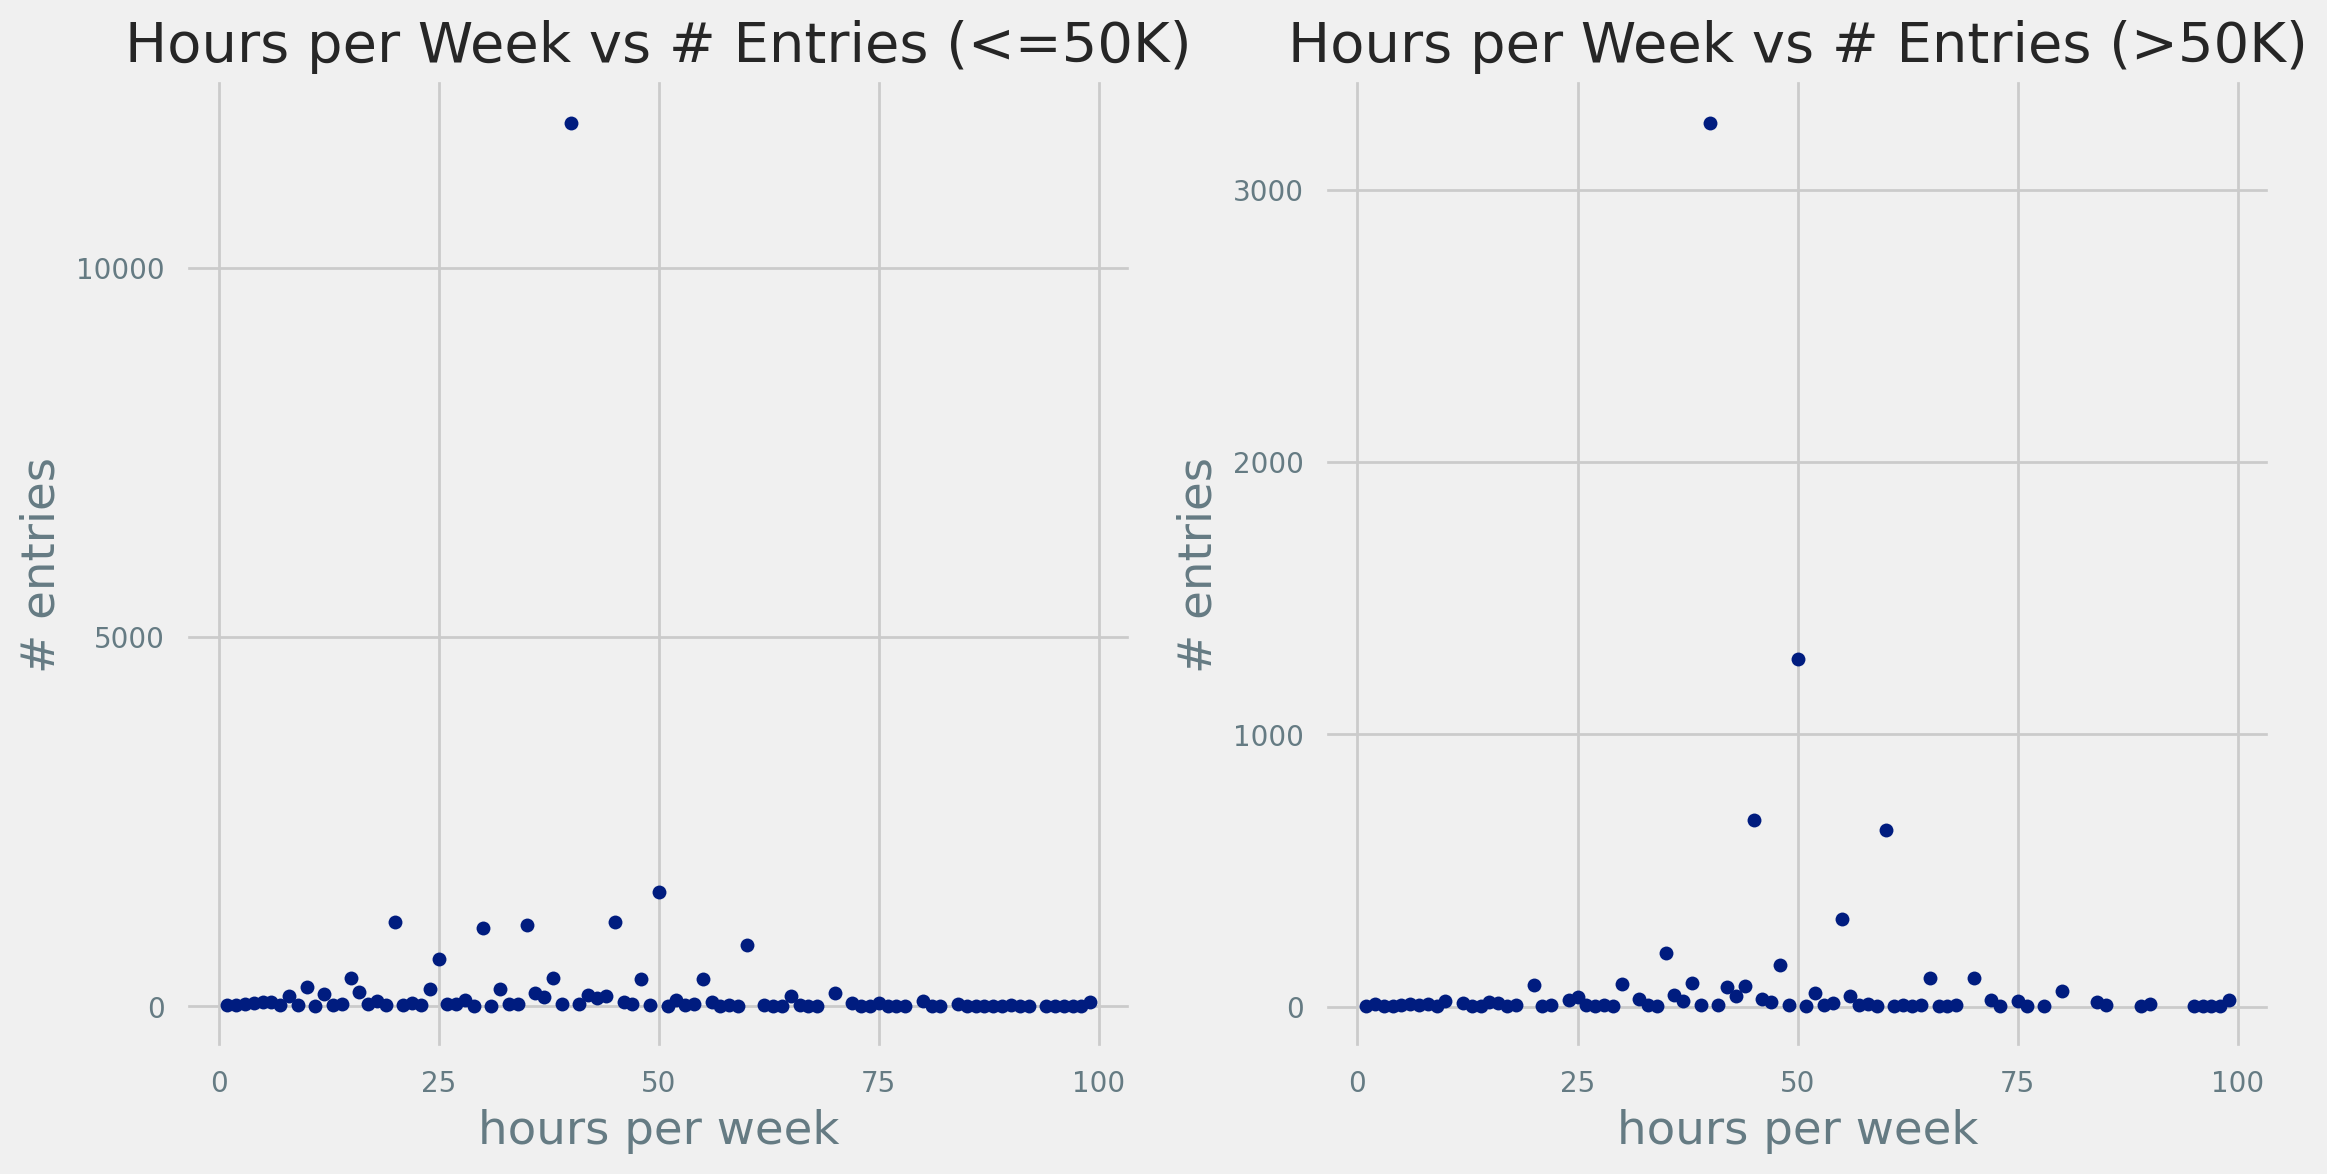

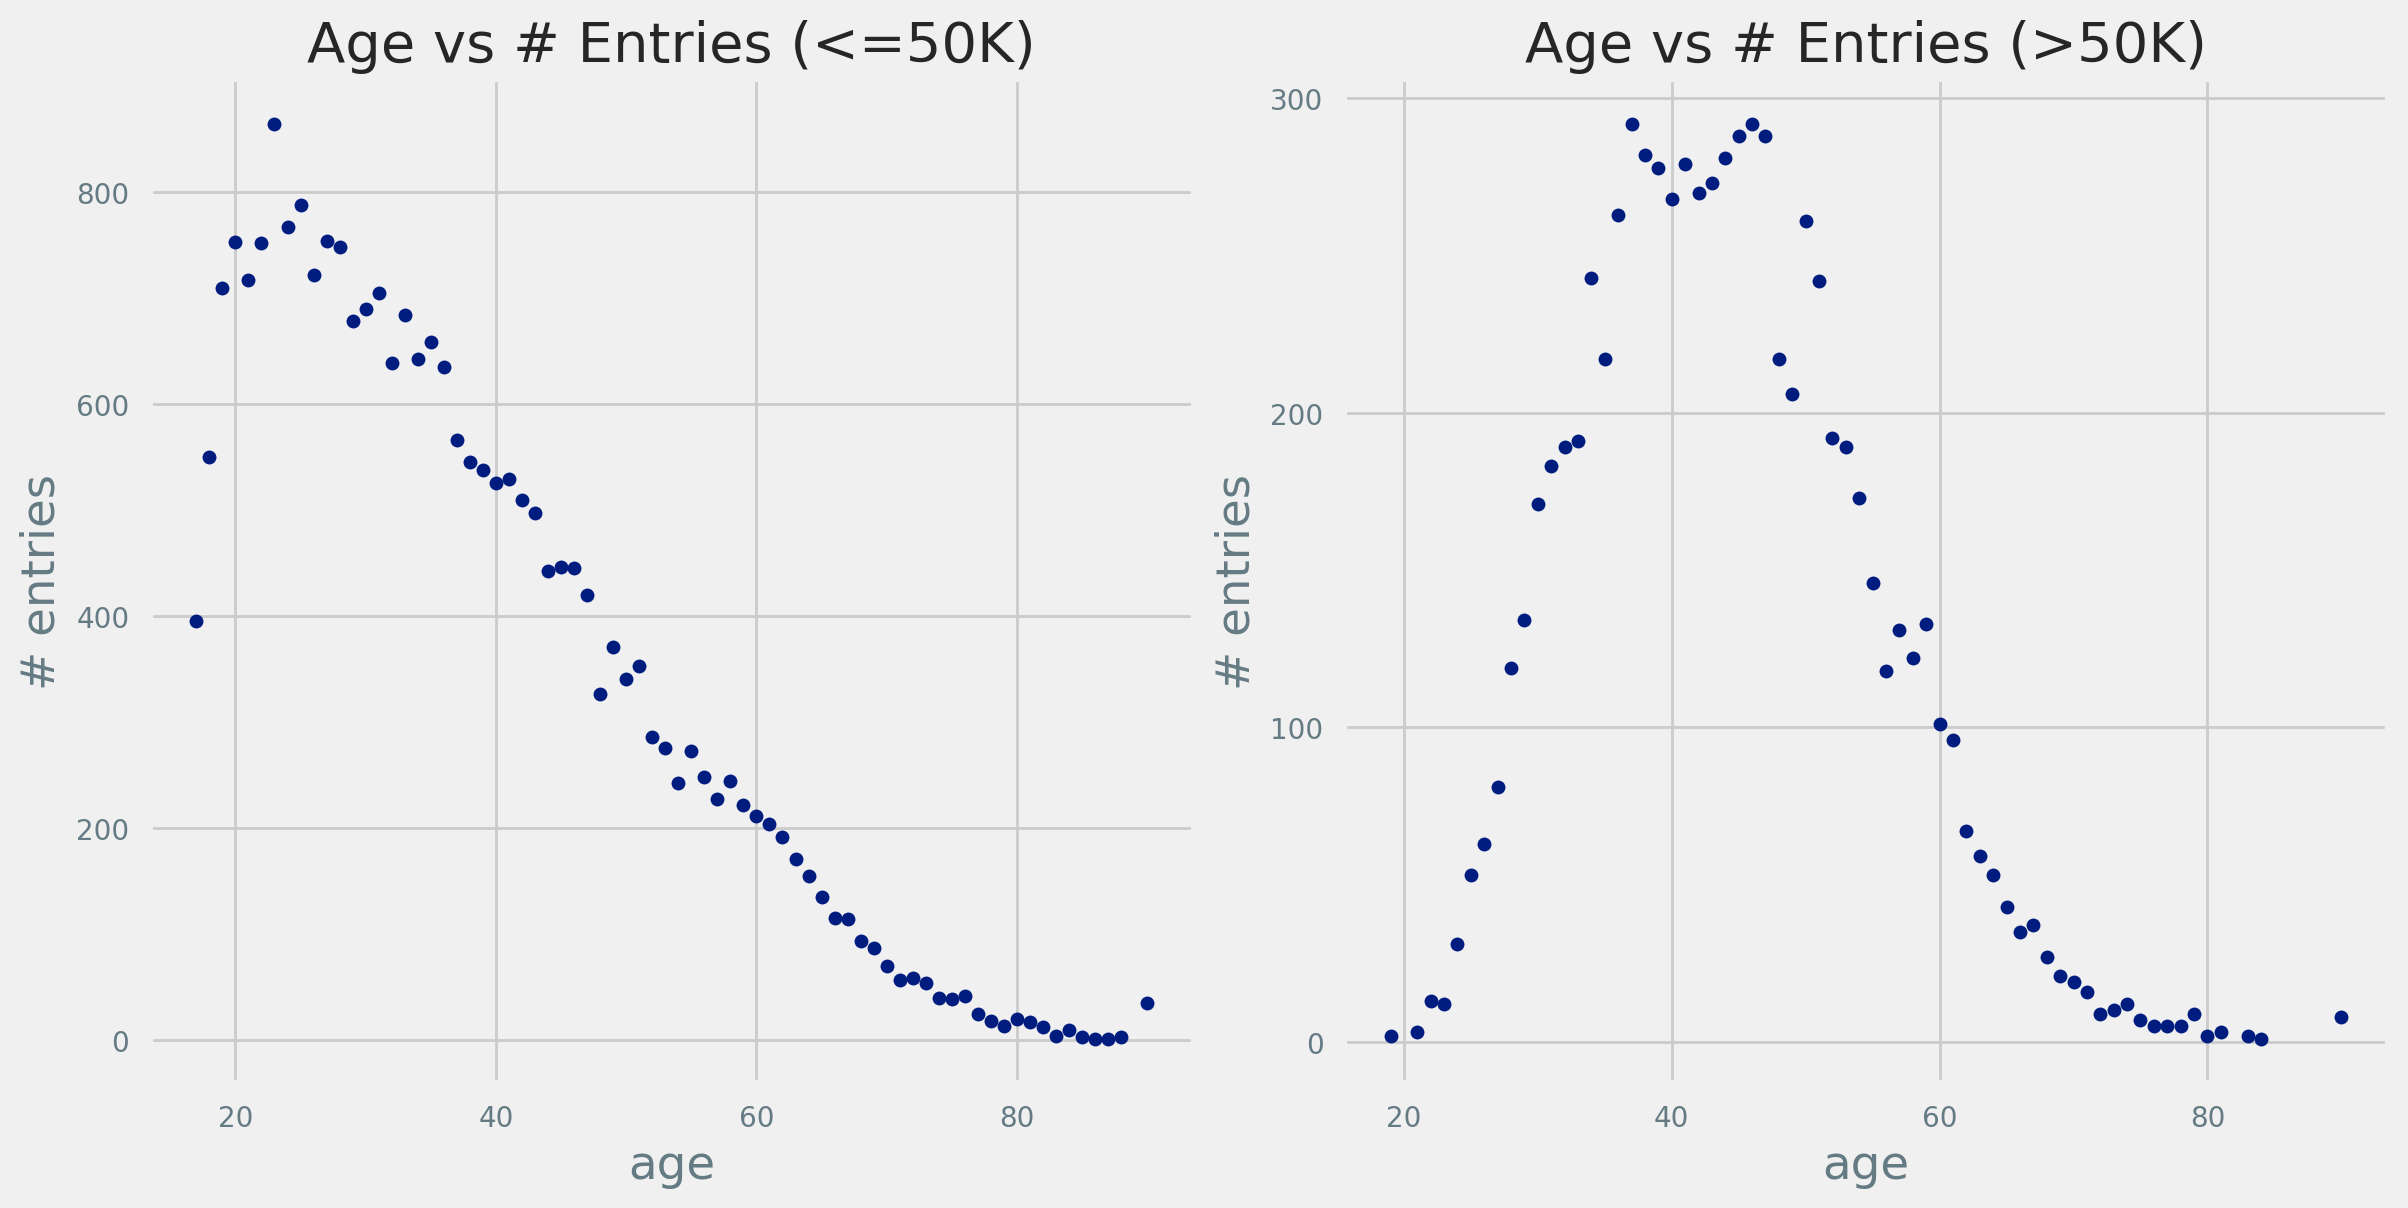

In [139]:
plt.close('all')
plt.style.use('seaborn-dark-palette')
hpw_v_i_le50k = df[df['label'] == " <=50K"].groupby(['hours-per-week', 'label']).size().reset_index()
hpw_v_i_gt50k = df[df['label'] == " >50K"].groupby(['hours-per-week', 'label']).size().reset_index()

age_v_hpw_le50k = df[df['label'] == " <=50K"].groupby(['age', 'label']).size().reset_index()
age_v_hpw_gt50k = df[df['label'] == " >50K"].groupby(['age', 'label']).size().reset_index()


fig,(sp1, sp2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=200)

def adjust_plot(ax, title, x_axis, y_axis, x_label, y_label):
    MARKERSIZE=5
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.locator_params(nbins=5)
    ax.plot(x_axis, y_axis, 'o',  markersize=MARKERSIZE)

adjust_plot(sp1, "Hours per Week vs # Entries (<=50K)", hpw_v_i_le50k['hours-per-week'], hpw_v_i_le50k[0], 'hours per week', '# entries')
adjust_plot(sp2, "Hours per Week vs # Entries (>50K)", hpw_v_i_gt50k['hours-per-week'], hpw_v_i_gt50k[0], 'hours per week', '# entries')



fig,(sp3, sp4) = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=200)

adjust_plot(sp3, "Age vs # Entries (<=50K)", age_v_hpw_le50k['age'], age_v_hpw_le50k[0], 'age', '# entries')
adjust_plot(sp4, "Age vs # Entries (>50K)", age_v_hpw_gt50k['age'], age_v_hpw_gt50k[0], 'age', '# entries')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

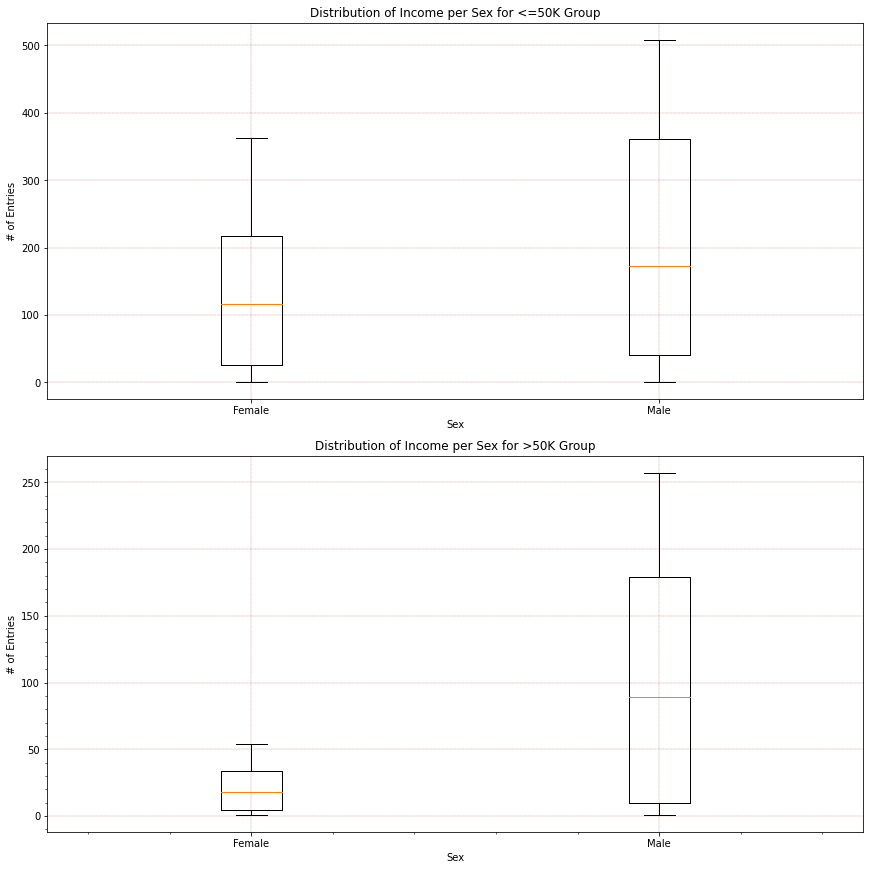

In [9]:
plt.close('all')

a = df[(df['label'] == " <=50K") & (df['sex'] == " Female")].groupby(['age', 'label']).size().reset_index()
b = df[(df['label'] == " <=50K") & (df['sex'] == " Male")].groupby(['age', 'label']).size().reset_index()
c = df[(df['label'] == " >50K") & (df['sex'] == " Female")].groupby(['age', 'label']).size().reset_index()
d = df[(df['label'] == " >50K") & (df['sex'] == " Male")].groupby(['age', 'label']).size().reset_index()

boxplot = plt.figure(figsize=(12,12))

ax1 = boxplot.add_subplot(2, 1, 1)
ax1.boxplot([a[0], b[0]], labels=['Female', 'Male'])

ax2 = boxplot.add_subplot(2, 1, 2)
ax2.boxplot([c[0], d[0]], labels=['Female', 'Male'])

ax1.set_xlabel('Sex')
ax1.set_ylabel('# of Entries')
ax1.set_title('Distribution of Income per Sex for <=50K Group')
ax1.grid(which='major', linestyle='--', linewidth='0.25', color='brown')
ax2.set_xlabel('Sex')
ax2.set_ylabel('# of Entries')
ax2.set_title('Distribution of Income per Sex for >50K Group')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='--', linewidth='0.25', color='brown')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

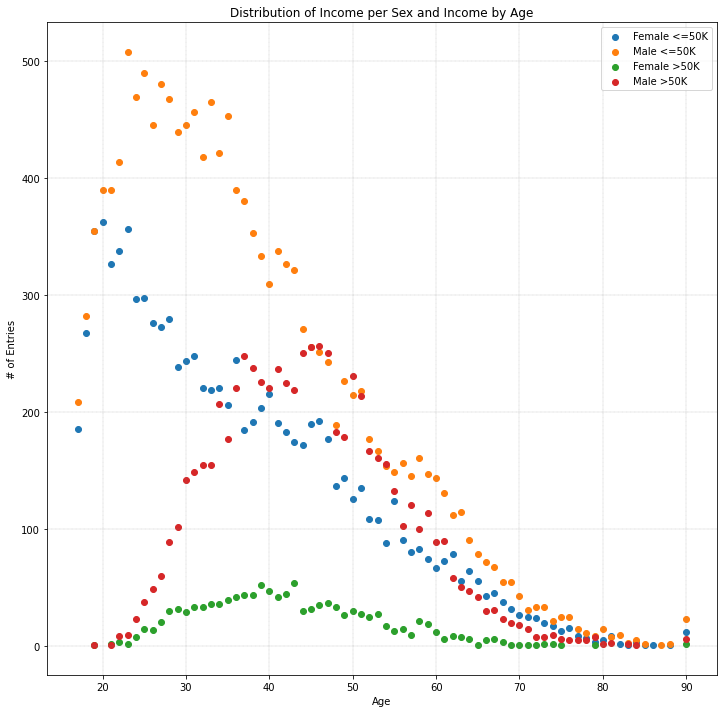

In [10]:
plt.close('all')

a = df[(df['label'] == " <=50K") & (df['sex'] == " Female")].groupby(['age', 'label']).size().reset_index()
b = df[(df['label'] == " <=50K") & (df['sex'] == " Male")].groupby(['age', 'label']).size().reset_index()
c = df[(df['label'] == " >50K") & (df['sex'] == " Female")].groupby(['age', 'label']).size().reset_index()
d = df[(df['label'] == " >50K") & (df['sex'] == " Male")].groupby(['age', 'label']).size().reset_index()


fig, ax = plt.subplots(figsize=(12,12))
for (color, legend, dataframe) in zip(
                                      ['tab:blue', 'tab:orange', 'tab:green', 'tab:red'],
                                      ['Female <=50K','Male <=50K','Female >50K','Male >50K'],
                                      [a, b, c, d]
                                      ):
    ax.scatter(dataframe['age'], dataframe[0], c=color, label=legend)

ax.legend()
ax.grid()
ax.grid(linestyle='--', linewidth='0.25', color='gray')
ax.set_xlabel('Age')
ax.set_ylabel('# of Entries')
ax.set_title('Distribution of Income per Sex and Income by Age')
plt.show()

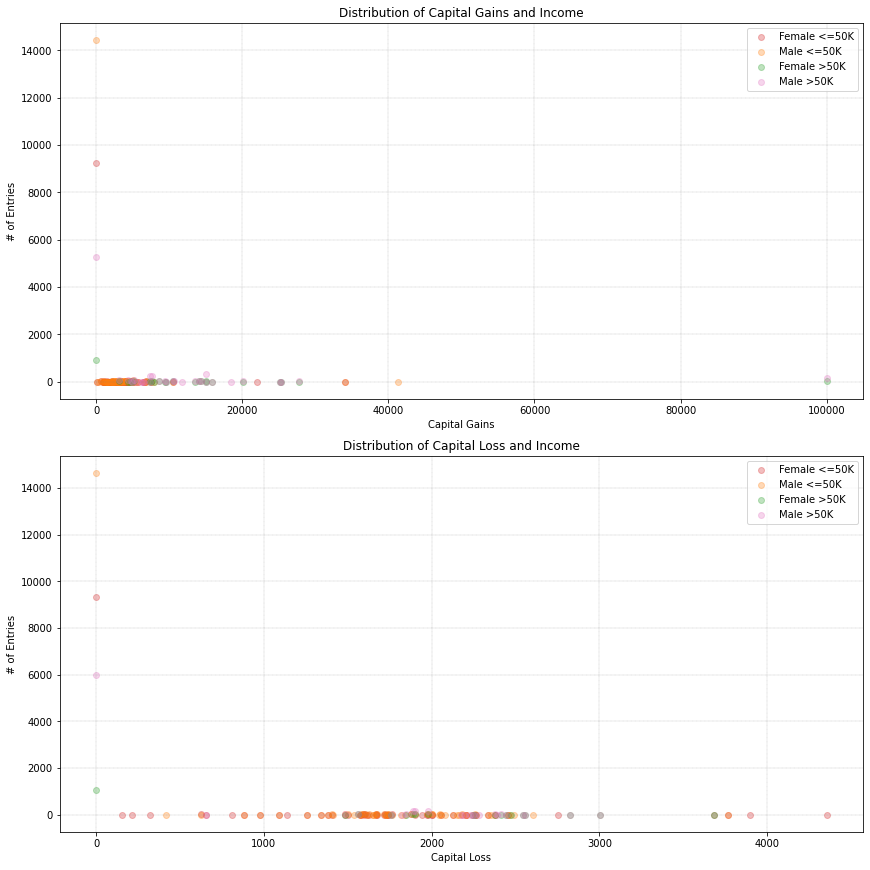

In [11]:
plt.close('all')

a = df[(df['label'] == " <=50K") & (df['sex'] == " Female")].groupby(['capital-gain', 'label']).size().reset_index()
b = df[(df['label'] == " <=50K") & (df['sex'] == " Male")].groupby(['capital-gain', 'label']).size().reset_index()
c = df[(df['label'] == " >50K") & (df['sex'] == " Female")].groupby(['capital-gain', 'label']).size().reset_index()
d = df[(df['label'] == " >50K") & (df['sex'] == " Male")].groupby(['capital-gain', 'label']).size().reset_index()

e = df[(df['label'] == " <=50K") & (df['sex'] == " Female")].groupby(['capital-loss', 'label']).size().reset_index()
f = df[(df['label'] == " <=50K") & (df['sex'] == " Male")].groupby(['capital-loss', 'label']).size().reset_index()
g = df[(df['label'] == " >50K") & (df['sex'] == " Female")].groupby(['capital-loss', 'label']).size().reset_index()
h = df[(df['label'] == " >50K") & (df['sex'] == " Male")].groupby(['capital-loss', 'label']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
def plot_scatter(ax1, ax2, a, b, c, d, e, f, g, h):
    for i, (color, legend, dataframe) in enumerate(zip(
                                          itertools.cycle(['tab:red', 'tab:orange', 'tab:green', 'tab:pink']),
                                          itertools.cycle(['Female <=50K', 'Male <=50K', 'Female >50K', 'Male >50K']),
                                          [a, b, c, d, e, f, g, h]
                                          )):
        if i < 4:
            ax1.scatter(dataframe['capital-gain'], dataframe[0], c=color, label=legend, alpha=0.3)
        else:
            ax2.scatter(dataframe['capital-loss'], dataframe[0], c=color, label=legend, alpha=0.3)

def setup_axis(ax, legend):
    ax.legend()
    ax.grid()
    ax.grid(linestyle='--', linewidth='0.25', color='gray')
    ax.set_xlabel(legend)
    ax.set_ylabel('# of Entries')
    ax.set_title('Distribution of {} and Income'.format(legend))

plot_scatter(ax1, ax2, a, b, c, d, e, f, g, h)
setup_axis(ax1, 'Capital Gains')
setup_axis(ax2, 'Capital Loss')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

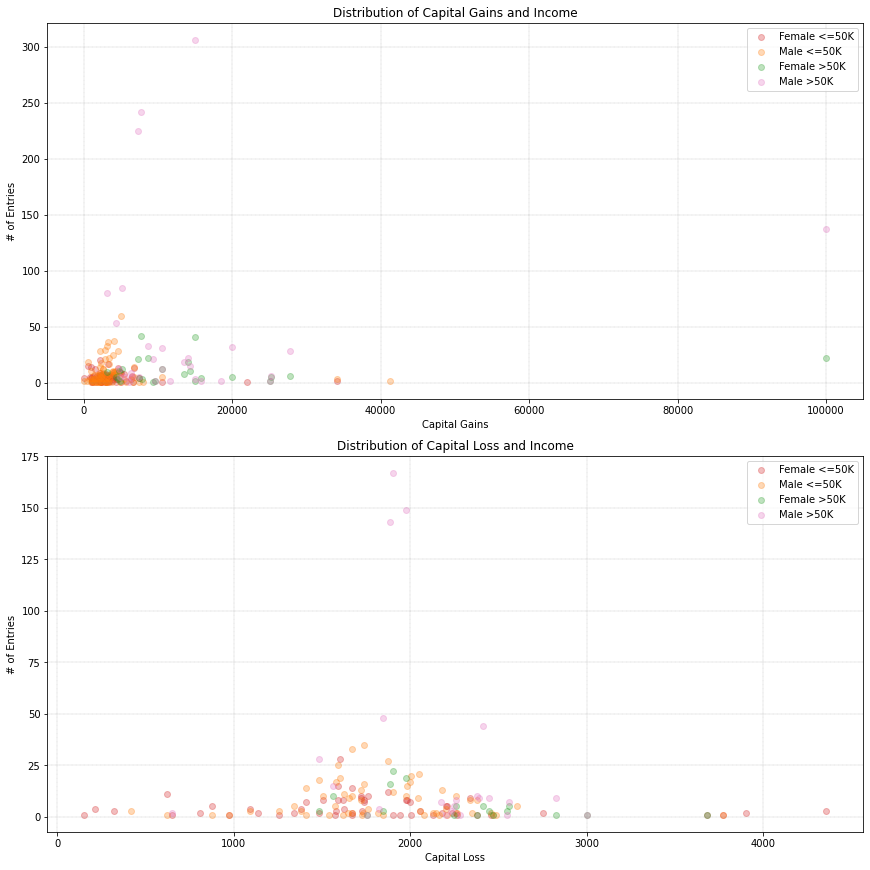

In [12]:
plt.close('all')

a = df[(df['label'] == " <=50K") & (df['sex'] == " Female") & (df['capital-gain'] != 0)].groupby(['capital-gain', 'label']).size().reset_index()
b = df[(df['label'] == " <=50K") & (df['sex'] == " Male") & (df['capital-gain'] != 0)].groupby(['capital-gain', 'label']).size().reset_index()
c = df[(df['label'] == " >50K") & (df['sex'] == " Female") & (df['capital-gain'] != 0)].groupby(['capital-gain', 'label']).size().reset_index()
d = df[(df['label'] == " >50K") & (df['sex'] == " Male") & (df['capital-gain'] != 0)].groupby(['capital-gain', 'label']).size().reset_index()

e = df[(df['label'] == " <=50K") & (df['sex'] == " Female") & (df['capital-loss'] != 0)].groupby(['capital-loss', 'label']).size().reset_index()
f = df[(df['label'] == " <=50K") & (df['sex'] == " Male") & (df['capital-loss'] != 0)].groupby(['capital-loss', 'label']).size().reset_index()
g = df[(df['label'] == " >50K") & (df['sex'] == " Female") & (df['capital-loss'] != 0)].groupby(['capital-loss', 'label']).size().reset_index()
h = df[(df['label'] == " >50K") & (df['sex'] == " Male") & (df['capital-loss'] != 0)].groupby(['capital-loss', 'label']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
plot_scatter(ax1, ax2, a, b, c, d, e, f, g, h)
setup_axis(ax1, 'Capital Gains')
setup_axis(ax2, 'Capital Loss')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

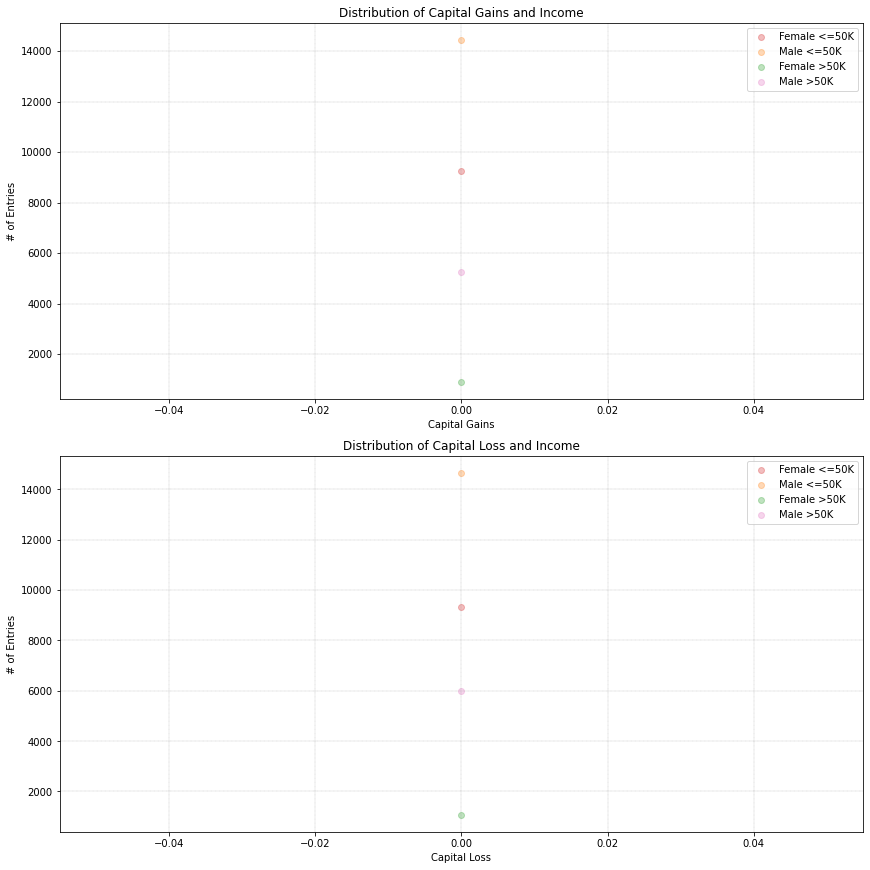

In [13]:
plt.close('all')
a = df[(df['label'] == " <=50K") & (df['sex'] == " Female") & (df['capital-gain'] == 0)].groupby(['capital-gain', 'label']).size().reset_index()
b = df[(df['label'] == " <=50K") & (df['sex'] == " Male") & (df['capital-gain'] == 0)].groupby(['capital-gain', 'label']).size().reset_index()
c = df[(df['label'] == " >50K") & (df['sex'] == " Female") & (df['capital-gain'] == 0)].groupby(['capital-gain', 'label']).size().reset_index()
d = df[(df['label'] == " >50K") & (df['sex'] == " Male") & (df['capital-gain'] == 0)].groupby(['capital-gain', 'label']).size().reset_index()

e = df[(df['label'] == " <=50K") & (df['sex'] == " Female") & (df['capital-loss'] == 0)].groupby(['capital-loss', 'label']).size().reset_index()
f = df[(df['label'] == " <=50K") & (df['sex'] == " Male") & (df['capital-loss'] == 0)].groupby(['capital-loss', 'label']).size().reset_index()
g = df[(df['label'] == " >50K") & (df['sex'] == " Female") & (df['capital-loss'] == 0)].groupby(['capital-loss', 'label']).size().reset_index()
h = df[(df['label'] == " >50K") & (df['sex'] == " Male") & (df['capital-loss'] == 0)].groupby(['capital-loss', 'label']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))
plot_scatter(ax1, ax2, a, b, c, d, e, f, g, h)
setup_axis(ax1, 'Capital Gains')
setup_axis(ax2, 'Capital Loss')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

In [154]:
def plot_stacked_bar(data, series_labels, axis, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None,x_label=None,
                     colors=None, title=None, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """
    cum_size = np.zeros(len(data[0]))
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axis.bar(category_labels, row_data, width=0.35, bottom=cum_size, label=series_labels[i], color=color)
        if title:
            axis.set_title(title, weight='bold')
        if y_label:
            axis.set_ylabel(y_label, fontsize=16)
        if x_label:
            axis.set_xlabel(x_label, fontsize=16)    
        cum_size += row_data


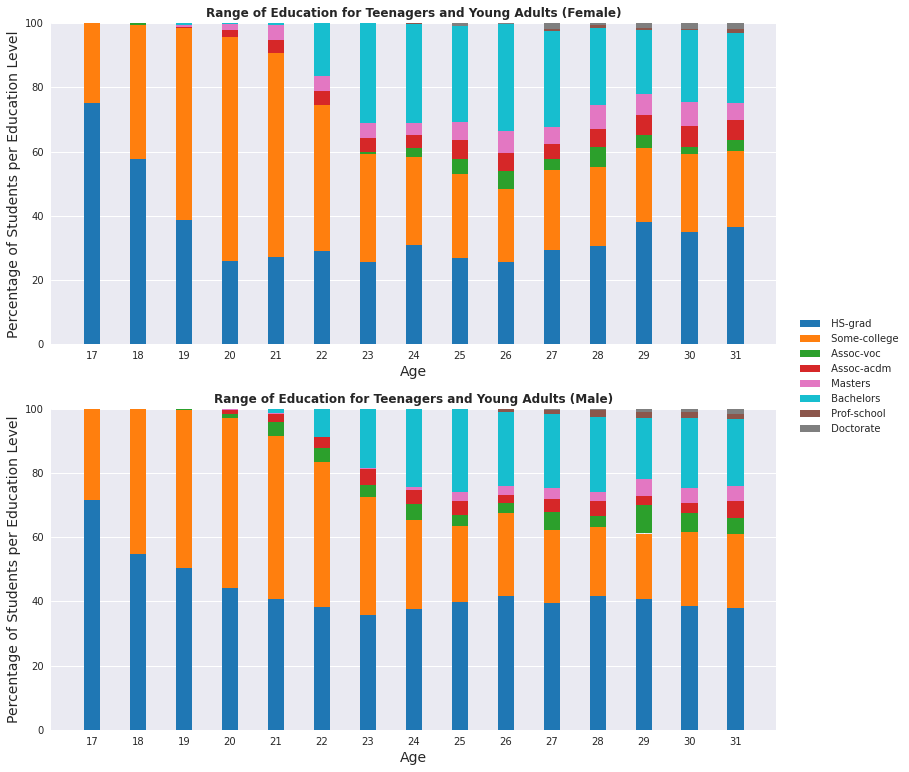

In [130]:
plt.close('all')

import matplotlib as mpl
mpl.style.use('seaborn-pastel')

def plot(dataset, ax, title=None):
    ages = dataset['age'].unique()
    educations = dataset['education'].unique()
    width = 0.35
    data = []
    for age in ages:
        subset = dataset[dataset['age'] == age][['education', 0]]
        total = subset[0].sum()
        counts = []
        for education in educations:
            count = subset[subset['education'] == education].iloc[0, 1] if subset.education.str.contains(education).any() else 0
            counts.append((count / total) * 100)
        for i, count in enumerate(counts):
            if i > len(data) - 1:
                data.append([count])
            else:
                data[i].append(count)
    plot_stacked_bar(
        data, 
        educations, 
        ax,
        title=title,
        category_labels=list(map(str, ages)), 
        colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink', 'tab:cyan', 'tab:brown', 'tab:gray'],
        x_label="Age",
        y_label="Percentage of Students per Education Level"
    )

# "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool."
# "Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate"
a = df[(df['sex'] == " Female") & 
       (df['age'] <= 31) & 
       (df['age'] > 15) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['age', 'education']).size().reset_index()
b = df[(df['sex'] == " Male") &
       (df['age'] <= 31) & 
       (df['age'] > 15) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['age', 'education']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(13,13))
plot(a, ax1, title="Range of Education for Teenagers and Young Adults (Female)")

plot(b, ax2, title="Range of Education for Teenagers and Young Adults (Male)")
plt.legend(loc='center left', bbox_to_anchor=(1.02, 1.1))
plt.show()


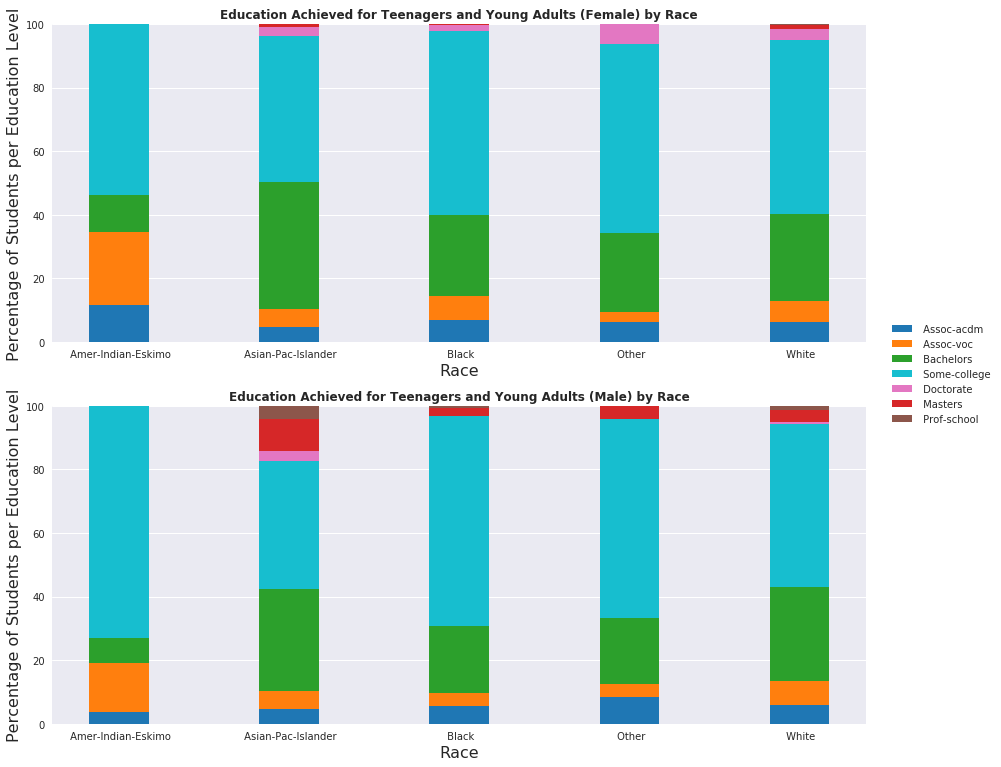

In [217]:
plt.close('all')

import matplotlib as mpl
plt.style.use('seaborn-darkgrid')

def plot(dataset, ax, title=None):
    ages = dataset['race'].unique()
    educations = dataset['education'].unique()
    width = 0.35
    data = []
    for age in ages:
        subset = dataset[dataset['race'] == age][['education', 0]]
        total = subset[0].sum()
        counts = []
        for education in educations:
            count = subset[subset['education'] == education].iloc[0, 1] if subset.education.str.contains(education).any() else 0
            counts.append((count / total) * 100)
        for i, count in enumerate(counts):
            if i > len(data) - 1:
                data.append([count])
            else:
                data[i].append(count)
    plot_stacked_bar(
        data, 
        educations, 
        ax,
        title=title,
        category_labels=list(map(str, ages)), 
        colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:cyan', 'tab:pink', 'tab:red', 'tab:brown'],
        x_label="Race",
        y_label="Percentage of Students per Education Level"
    )

# "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool."
# "Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate"
a = df[(df['sex'] == " Female") & 
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool') &
       (df['education'] != ' HS-grad')
      ] \
    .groupby(['race', 'education']).size().reset_index()
b = df[(df['sex'] == " Male") &
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool') &
       (df['education'] != ' HS-grad')
      ] \
    .groupby(['race', 'education']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(13,12))
plot(a, ax1, title="Education Achieved for Teenagers and Young Adults (Female) by Race")

plot(b, ax2, title="Education Achieved for Teenagers and Young Adults (Male) by Race")
plt.legend(loc='center left', bbox_to_anchor=(1.02, 1.1))
plt.show()

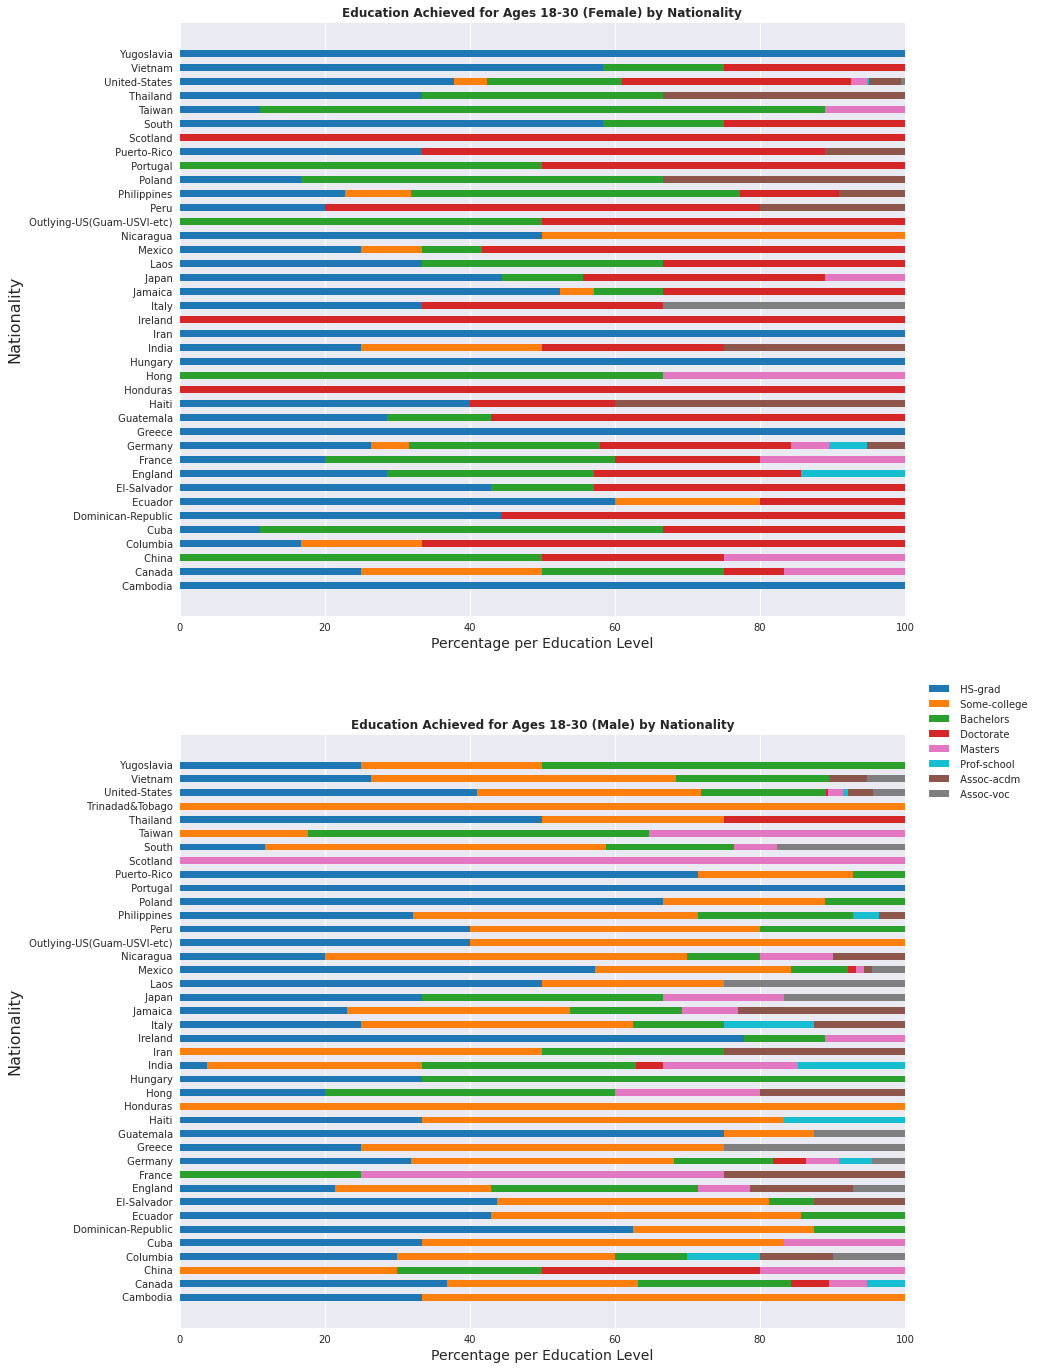

In [127]:
plt.close('all')

import matplotlib as mpl
mpl.style.use('seaborn')

def plot_stacked_barh(data, series_labels, axis, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None,x_label=None,
                     colors=None, title=None, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """
    cum_size = np.zeros(len(data[0]))
    y_pos = np.arange(len(category_labels))
    ax.invert_yaxis()
    ax.set_xticks(y_pos)
    ax.set_xticklabels(category_labels)
    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        
        axis.barh(y_pos, row_data, 0.5, left=cum_size, color=color, label=series_labels[i], tick_label=category_labels)
        if title:
            axis.set_title(title, weight='bold')
        if y_label:
            axis.set_ylabel(y_label, fontsize=16)
        if x_label:
            axis.set_xlabel(x_label, fontsize=14)    
        cum_size += row_data
    
        
def plot(dataset, ax, title=None):
    ages = dataset['native-country'].unique()
    educations = dataset['education'].unique()
    width = 0.35
    data = []
    for age in ages:
        subset = dataset[dataset['native-country'] == age][['education', 0]]
        total = subset[0].sum()
        counts = []
        for education in educations:
            count = subset[subset['education'] == education].iloc[0, 1] if subset.education.str.contains(education).any() else 0
            counts.append((count / total) * 100)
        for i, count in enumerate(counts):
            if i > len(data) - 1:
                data.append([count])
            else:
                data[i].append(count)
    plot_stacked_barh(
        data, 
        educations, 
        ax,
        title=title,
        category_labels=list(map(str, ages)), 
        colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:pink', 'tab:cyan', 'tab:brown', 'tab:gray'],
        x_label="Percentage per Education Level",
        y_label="Nationality"
    )


# "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool."
# "Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate"
a = df[(df['sex'] == " Female") & 
       (df['native-country'] != ' ?') &
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['native-country', 'education']).size().reset_index()
b = df[(df['sex'] == " Male") &
       (df['native-country'] != ' ?') &
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['native-country', 'education']).size().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(13,24))
plot(a, ax1, title="Education Achieved for Ages 18-30 (Female) by Nationality")

plot(b, ax2, title="Education Achieved for Ages 18-30 (Male) by Nationality")
plt.legend(loc='best', bbox_to_anchor=(1.02, 1.1))
plt.show()

In [212]:
plt.close('all')

import matplotlib as mpl
mpl.style.use('seaborn')

def plot(dataset, ax, title=None):
    countries = dataset['native-country'].unique()
    educations = dataset['label'].unique()
    width = 0.35
    data = []
    for country in countries:
        subset = dataset[dataset['native-country'] == country][['label', 0]]
        total = subset[0].sum()
        counts = []
        for education in educations:
            count = subset[subset['label'] == education].iloc[0, 1] if subset.label.str.contains(education).any() else 0
            counts.append((count / total) * 100)
        for i, count in enumerate(counts):
            if i > len(data) - 1:
                data.append([count])
            else:
                data[i].append(count)
    plot_stacked_barh(
        data, 
        educations, 
        ax,
        title=title,
        category_labels=list(map(str, countries)), 
        colors=['tab:blue', 'tab:pink', 'tab:green', 'tab:red', 'tab:pink', 'tab:cyan', 'tab:brown', 'tab:gray'],
        x_label="Percentage of Salary Distribution",
        y_label="Nationality"
    )


# "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool."
# "Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate"
a = df[(df['sex'] == " Female") & 
       (df['native-country'] != ' ?') &
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['native-country', 'label']).size().reset_index()
b = df[(df['sex'] == " Male") &
       (df['native-country'] != ' ?') &
       (df['age'] <= 31) & 
       (df['age'] > 17) &
       (df['education'] != ' 10th') &
       (df['education'] != ' 11th') &
       (df['education'] != ' 12th') &
       (df['education'] != ' 1st-4th') &
       (df['education'] != ' 5th-6th') &
       (df['education'] != ' 7th-8th') &
       (df['education'] != ' 9th') &
       (df['education'] != ' Preschool')
      ] \
    .groupby(['native-country', 'label']).size().reset_index()


a_americas = a[(a['native-country'] == " Canada") | # - Americas
  (a['native-country'] == " Columbia") |   # - Americas
  (a['native-country'] == " Cuba") |   # - Americas
  (a['native-country'] == " Dominican-Republic") | # - Americas
  (a['native-country'] == " Ecuador") |    # - Americas
  (a['native-country'] == " El-Salvador") |    # - Americas
  (a['native-country'] == " Guatemala") |  # - Americas
  (a['native-country'] == " Haiti") |  # - Americas
  (a['native-country'] == " Honduras") |   # - Americas
  (a['native-country'] == " Jamaica") |    # - Americas
  (a['native-country'] == " Mexico") | # - Americas
  (a['native-country'] == " Nicaragua") |  # - Americas
  (a['native-country'] == " Outlying-US(Guam-USVI-etc)") | # - Americas
  (a['native-country'] == " Peru") |   # - Americas
  (a['native-country'] == " Puerto-Rico") |    # - Americas
  (a['native-country'] == " Trinadad|Tobago") |    # - Americas
  (a['native-country'] == " United-States")  # - Americas
  ]
a_asia = a[(a['native-country'] == " Cambodia") |   # - Asia
  (a['native-country'] == " China") |  # - Asia
  (a['native-country'] == " Hong") |   # - Asia
  (a['native-country'] == " India") |  # - Asia
  (a['native-country'] == " Iran") |   # - Asia
  (a['native-country'] == " Japan") |  # - Asia
  (a['native-country'] == " Laos") |   # - Asia
  (a['native-country'] == " Philippines") |    # -Asia
  (a['native-country'] == " South") |  # - Asia
  (a['native-country'] == " Taiwan") | # - Asia
  (a['native-country'] == " Thailand") |   # - Asia
  (a['native-country'] == " Vietnam")    # - Asia
  ]
a_europe = a[(a['native-country'] == " England") |    # - Europe
  (a['native-country'] == " France") | # - Europe
  (a['native-country'] == " Germany") |    # - Europe
  (a['native-country'] == " Greece") | # - Europe
  (a['native-country'] == " Hungary") |    # - Europe
  (a['native-country'] == " Ireland") |    # - Europe
  (a['native-country'] == " Italy") |  # - Europe
  (a['native-country'] == " Poland") | # - Europe
  (a['native-country'] == " Portugal") |   # - Europe
  (a['native-country'] == " Scotland") |   # - Europe
  (a['native-country'] == " Yugoslavia")   # - Europe
  ]

b_americas = b[(b['native-country'] == " Canada") | # - Americas
  (b['native-country'] == " Columbia") |   # - Americas
  (b['native-country'] == " Cuba") |   # - Americas
  (b['native-country'] == " Dominican-Republic") | # - Americas
  (b['native-country'] == " Ecuador") |    # - Americas
  (b['native-country'] == " El-Salvador") |    # - Americas
  (b['native-country'] == " Guatemala") |  # - Americas
  (b['native-country'] == " Haiti") |  # - Americas
  (b['native-country'] == " Honduras") |   # - Americas
  (b['native-country'] == " Jamaica") |    # - Americas
  (b['native-country'] == " Mexico") | # - Americas
  (b['native-country'] == " Nicaragua") |  # - Americas
  (b['native-country'] == " Outlying-US(Guam-USVI-etc)") | # - Americas
  (b['native-country'] == " Peru") |   # - Americas
  (b['native-country'] == " Puerto-Rico") |    # - Americas
  (b['native-country'] == " Trinadad|Tobago") |    # - Americas
  (b['native-country'] == " United-States")  # - Americas
  ]
b_asia = b[(b['native-country'] == " Cambodia") |   # - Asia
  (b['native-country'] == " China") |  # - Asia
  (b['native-country'] == " Hong") |   # - Asia
  (b['native-country'] == " India") |  # - Asia
  (b['native-country'] == " Iran") |   # - Asia
  (b['native-country'] == " Japan") |  # - Asia
  (b['native-country'] == " Laos") |   # - Asia
  (b['native-country'] == " Philippines") |    # -Asia
  (b['native-country'] == " South") |  # - Asia
  (b['native-country'] == " Taiwan") | # - Asia
  (b['native-country'] == " Thailand") |   # - Asia
  (b['native-country'] == " Vietnam")    # - Asia
  ]
b_europe = b[(b['native-country'] == " England") |    # - Europe
  (b['native-country'] == " France") | # - Europe
  (b['native-country'] == " Germany") |    # - Europe
  (b['native-country'] == " Greece") | # - Europe
  (b['native-country'] == " Hungary") |    # - Europe
  (b['native-country'] == " Ireland") |    # - Europe
  (b['native-country'] == " Italy") |  # - Europe
  (b['native-country'] == " Poland") | # - Europe
  (b['native-country'] == " Portugal") |   # - Europe
  (b['native-country'] == " Scotland") |   # - Europe
  (b['native-country'] == " Yugoslavia")   # - Europe
  ]


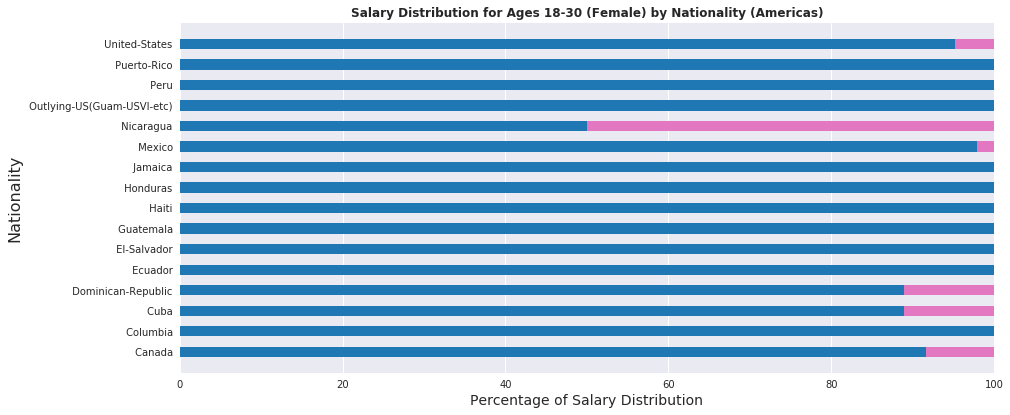

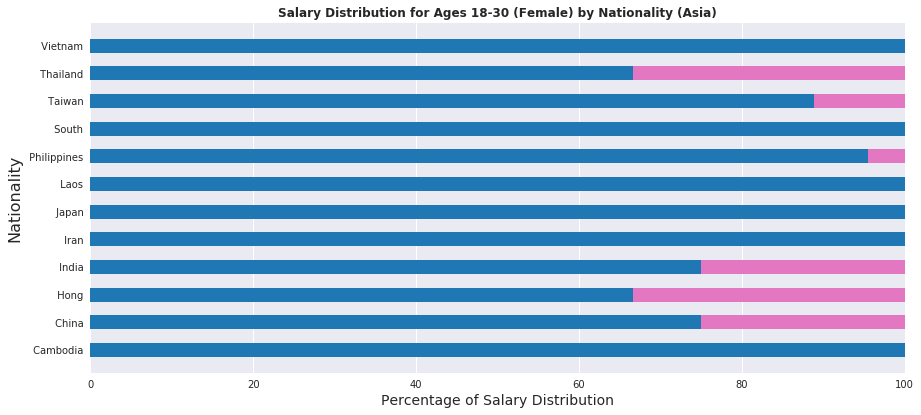

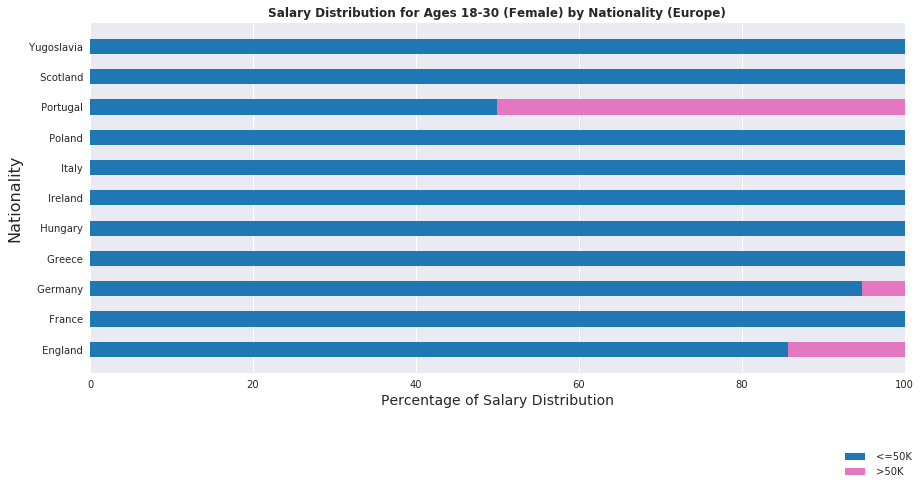

In [213]:

fa, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))

plot(a_americas, ax1, title="Salary Distribution for Ages 18-30 (Female) by Nationality (Americas)")

fb, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))
plot(a_asia, ax2, title="Salary Distribution for Ages 18-30 (Female) by Nationality (Asia)")

fc, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))
plot(a_europe, ax3, title="Salary Distribution for Ages 18-30 (Female) by Nationality (Europe)")

plt.legend(loc='best', bbox_to_anchor=(1.02, -0.2))

plt.show()

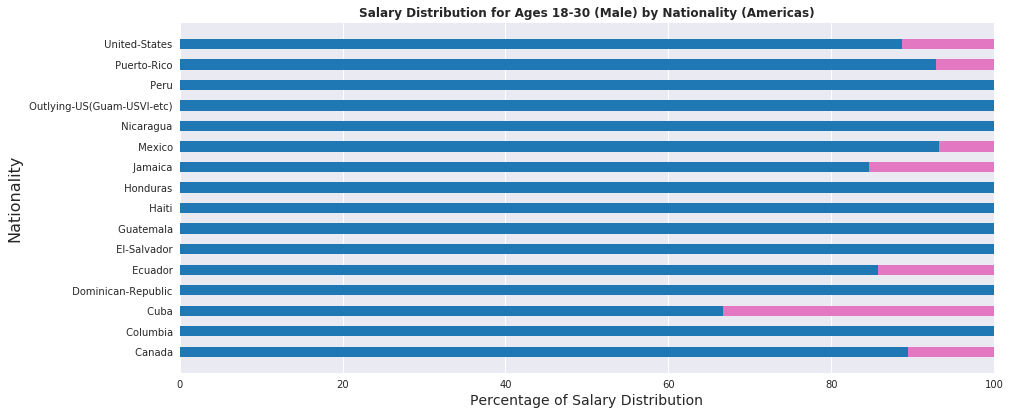

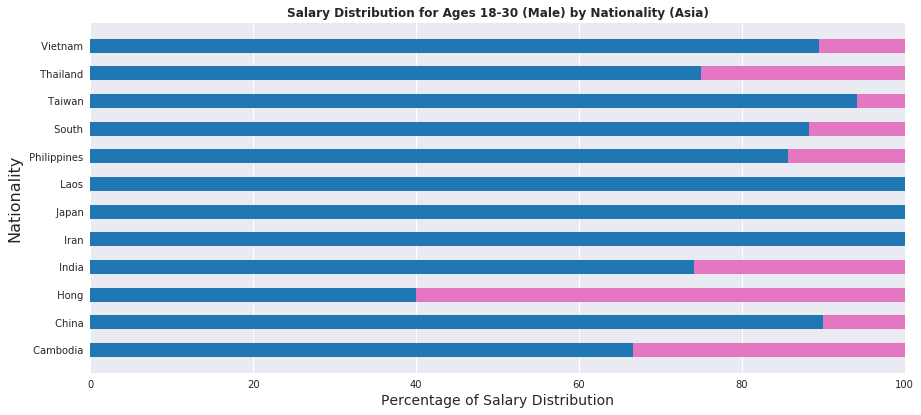

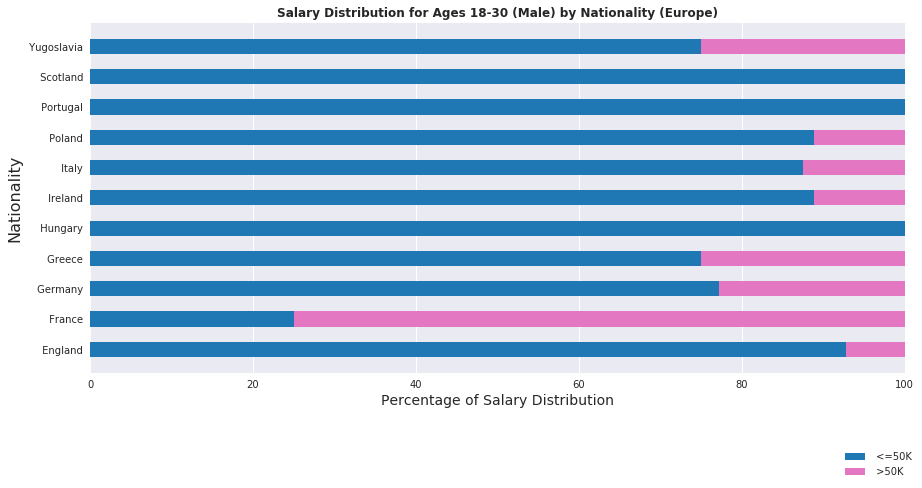

In [214]:
plt.close('all')
f2, bx1 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))

plot(b_americas, bx1, title="Salary Distribution for Ages 18-30 (Male) by Nationality (Americas)")

f3, bx2 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))
plot(b_asia, bx2, title="Salary Distribution for Ages 18-30 (Male) by Nationality (Asia)")

f4, bx3 = plt.subplots(nrows=1, ncols=1, figsize=(13,6))
plot(b_europe, bx3, title="Salary Distribution for Ages 18-30 (Male) by Nationality (Europe)")

plt.legend(loc='best', bbox_to_anchor=(1.02, -0.2))
plt.show()